In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

In [189]:
df1 =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Company Stock and Investment.csv')
df1

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


In [190]:
df1.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [191]:
df1.columns=["Date","Oil","Gold","Comp_stock","Other_share"]
df1

,Date,Oil,Gold,Comp_stock,Other_share
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


In [192]:
df1.shape

(1984, 5)

In [193]:
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()

Series([], dtype: float64)

In [194]:
df1.dtypes

Date            object
Oil            float64
Gold           float64
Comp_stock     float64
Other_share    float64
dtype: object

In [195]:
df= pd.DataFrame(df1)

# convert the datetime column to a datetime type
df.Date = pd.to_datetime(df.Date)

# set the column as the index
df.set_index('Date', inplace=True)

In [196]:
df.head()

,Oil,Gold,Comp_stock,Other_share
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [197]:
df.describe()

,Oil,Gold,Comp_stock,Other_share
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [198]:
df_oil=pd.DataFrame(data=df)
df_oil.drop("Gold",axis=1,inplace=True)
df_oil.drop("Comp_stock",axis=1,inplace=True)
df_oil.drop("Other_share",axis=1,inplace=True)
df_oil

,Oil
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
2010-08-01,0.001269
2010-11-01,-0.002417
2010-12-01,-0.021202
2010-01-13,-0.013987


In [199]:
df_gold=pd.DataFrame(data=df)
df_gold.drop("Oil",axis=1,inplace=True)
df_gold.drop("Comp_stock",axis=1,inplace=True)
df_gold.drop("Other_share",axis=1,inplace=True)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
2010-08-01,-0.013097
2010-11-01,0.023297
2010-12-01,-0.001518
2010-01-13,-0.020847


In [200]:
df_Comp_stock=pd.DataFrame(data=df)
df_Comp_stock.drop("Oil",axis=1,inplace=True)
df_Comp_stock.drop("Gold",axis=1,inplace=True)
df_Comp_stock.drop("Other_share",axis=1,inplace=True)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
2010-08-01,0.006648
2010-11-01,-0.008822
2010-12-01,-0.011375
2010-01-13,0.014106


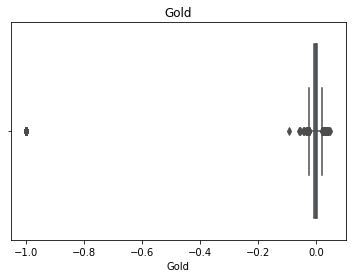

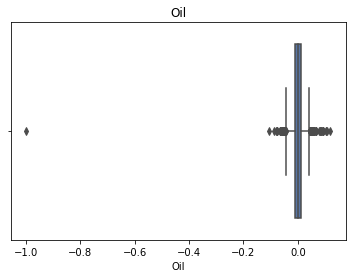

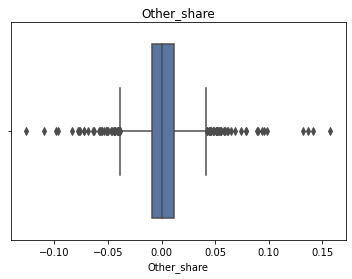

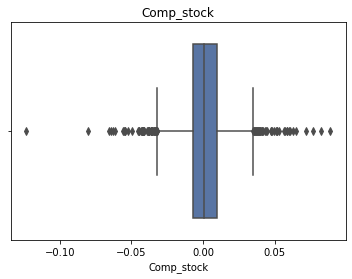

In [201]:
import seaborn as sns
columns={'Oil', 'Gold', 'Comp_stock', 'Other_share'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

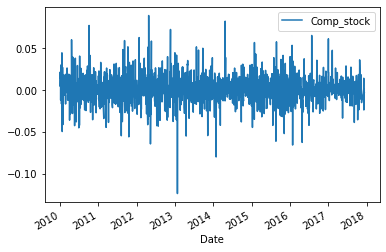

In [202]:
#plot Comp_stock
df_Comp_stock.plot()

In [203]:
df_Comp_stock = df_Comp_stock.replace(0, np.nan)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
2010-08-01,0.006648
2010-11-01,-0.008822
2010-12-01,-0.011375
2010-01-13,0.014106


In [204]:
df_Comp_stock.isnull().sum()

Comp_stock    2
dtype: int64

In [205]:
df_Comp_Stock=df_Comp_stock.dropna(how='any')

In [206]:
df_Comp_Stock.Comp_stock.round(3)

Date
2009-12-31    0.017
2010-04-01    0.016
2010-05-01    0.002
2010-06-01   -0.016
2010-07-01   -0.002
2010-08-01    0.007
2010-11-01   -0.009
2010-12-01   -0.011
2010-01-13    0.014
2010-01-14   -0.006
2010-01-15   -0.017
2010-01-19    0.044
2010-01-20   -0.015
2010-01-21   -0.017
2010-01-22   -0.050
2010-01-25    0.027
2010-01-26    0.014
2010-01-27    0.009
2010-01-28   -0.041
2010-01-29   -0.036
2010-01-02    0.014
2010-02-02    0.006
2010-03-02    0.017
2010-04-02   -0.036
2010-05-02    0.018
2010-08-02   -0.007
2010-09-02    0.011
2010-10-02   -0.005
2010-11-02    0.018
2010-12-02    0.009
              ...  
2017-05-10    0.012
2017-06-10   -0.001
2017-09-10    0.003
2017-10-10    0.000
2017-11-10    0.004
2017-12-10   -0.004
2017-10-13    0.006
2017-10-16    0.018
2017-10-17    0.004
2017-10-18   -0.004
2017-10-19   -0.024
2017-10-20    0.002
2017-10-23   -0.001
2017-10-24    0.006
2017-10-25   -0.004
2017-10-26    0.006
2017-10-27    0.036
2017-10-30    0.023
2017-10-31    0

In [207]:
# adfuller give us 5 values
test_result=adfuller(df_Comp_Stock['Comp_stock'])

In [208]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.481458670962319, 3.084821113179924e-23, 12, 1969, {'1%': -3.433675467561267, '5%': -2.863008999826203, '10%': -2.5675520348463654}, -10637.541220712725)


In [209]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_Comp_stock(Comp_stock):
    result=adfuller(Comp_stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [210]:
adfuller_test_Comp_stock(df_Comp_Stock['Comp_stock'])

ADF Test Statistic : -12.481458670962319
p-value : 3.084821113179924e-23
#Lags Used : 12
Number of Observations Used : 1969
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


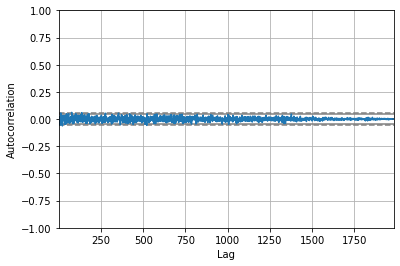

In [211]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_Comp_Stock['Comp_stock'])
plt.show()

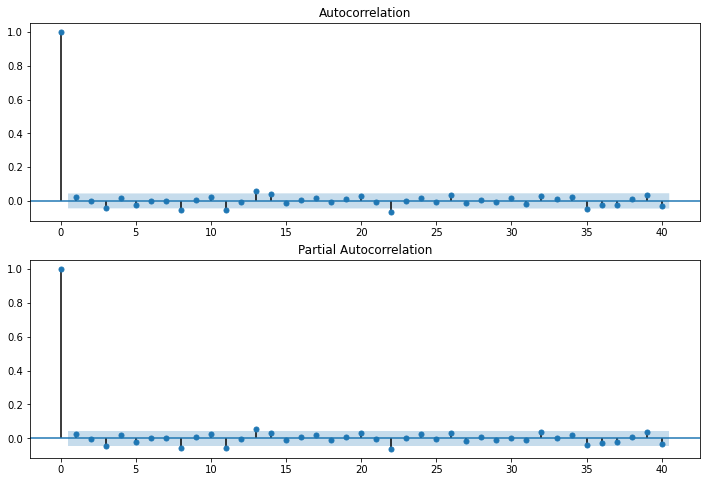

In [212]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No  values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_Comp_Stock['Comp_stock'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Comp_Stock['Comp_stock'].iloc[1:],lags=40,ax=ax2)

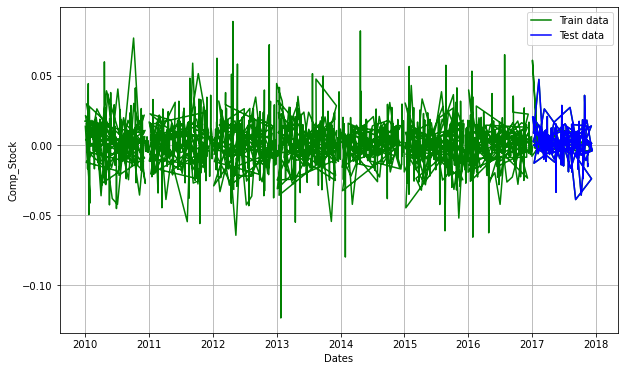

In [213]:
#split data into train and training set
df_log=df_Comp_Stock
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Comp_Stock')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [215]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9553.320, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9552.460, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9552.456, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9550.460, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9557.120, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9555.987, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9555.990, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9553.950, Time=0.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.978 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1780
Model:                        SARIMAX   Log Likelihood                4780.560
Date:                Sun, 01 Nov 2020   AIC                          -9557.120
Time:                       

In [216]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_Comp_Stock['Comp_stock'],order=(0,0,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Comp_stock   No. Observations:                 1982
Model:                     ARMA(0, 0)   Log Likelihood                5381.003
Method:                           css   S.D. of innovations              0.016
Date:                Sun, 01 Nov 2020   AIC                         -10758.006
Time:                        09:26:04   BIC                         -10746.823
Sample:                             0   HQIC                        -10753.898
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.802      0.005       0.000       0.002
==============================================================================
"""

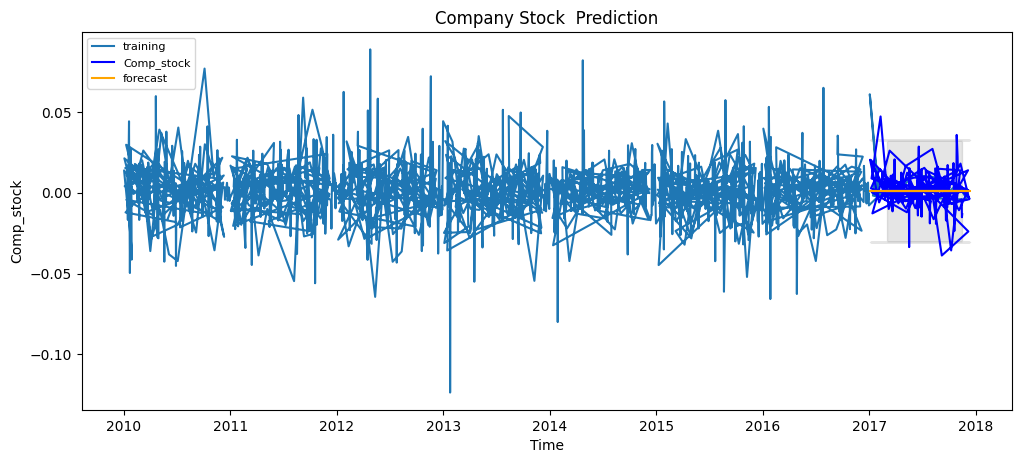

In [217]:
# Forecast
fc, se, conf = model_fit.forecast(199, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Comp_stock')
plt.plot(fc_series, color = 'orange',label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Company Stock  Prediction')
plt.xlabel('Time')
plt.ylabel('Comp_stock')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))


MSE: 0.00011987962962935485
MAE: 0.00787184874473772
RMSE: 0.010948955641035124


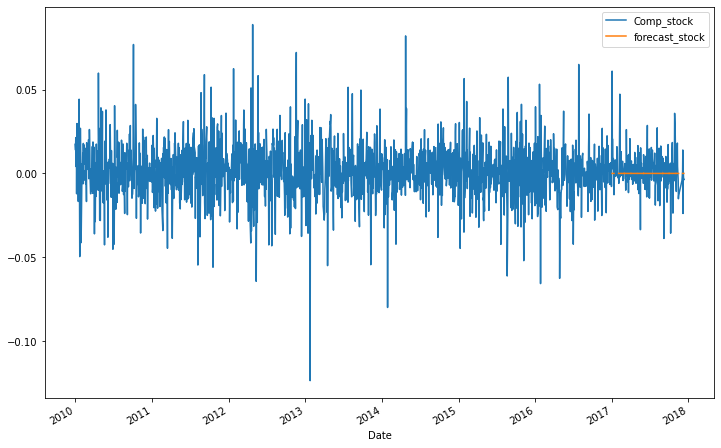

In [219]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_Comp_Stock['Comp_stock'],order=(0, 0, 0)) #(p,d,q)
results_stock=model.fit()
df_Comp_Stock['forecast_stock']=results_stock.predict(start=1781,end=1981,dynamic=False)
df_Comp_Stock[['Comp_stock','forecast_stock']].plot(figsize=(12,8))

**`Gold - Testing For Stationarity`**

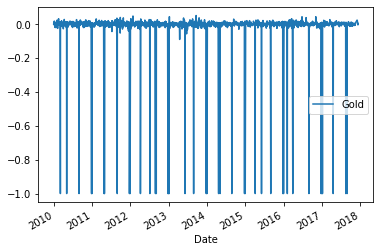

In [220]:
#plot Gold
df_gold.plot()

In [221]:
df_gold = df_gold.replace(0, np.nan)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
2010-08-01,-0.013097
2010-11-01,0.023297
2010-12-01,-0.001518
2010-01-13,-0.020847


In [222]:
df_gold.isnull().sum()

Gold    64
dtype: int64

In [223]:
df_gold["Gold"] = df_gold["Gold"].fillna(df_gold["Gold"].dropna().mode().values[0] )

In [224]:
test_result_gold=adfuller(df_gold['Gold']) # adfuller give us 5 values

In [225]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_gold)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-16.314261015489084, 3.1736637996189835e-29, 5, 1978, {'1%': -3.4336603168110695, '5%': -2.8630023108088545, '10%': -2.5675484732666}, -813.3817952641643)


In [226]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Gold):
    result=adfuller(Gold)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [227]:
adfuller_test(df_gold['Gold'])

ADF Test Statistic : -16.314261015489084
p-value : 3.1736637996189835e-29
#Lags Used : 5
Number of Observations Used : 1978
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [228]:
df_gold=df_gold.dropna(how='any')

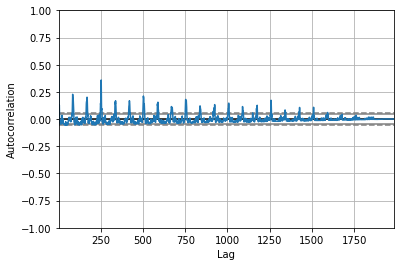

In [229]:
autocorrelation_plot(df_gold['Gold'])
plt.show()

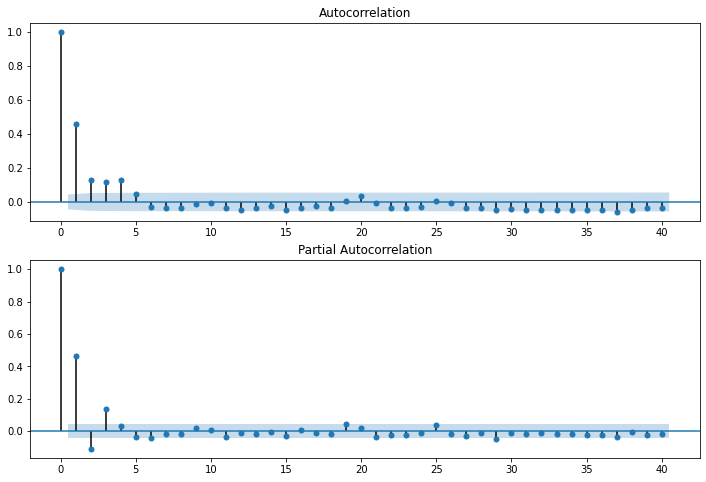

In [230]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_gold['Gold'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_gold['Gold'].iloc[1:],lags=40,ax=ax2)

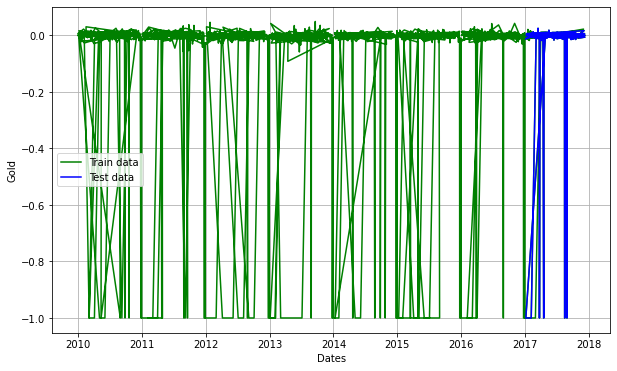

In [231]:
#split data into train and training set
df_log=df_gold
train_data_gold, test_data_gold = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Gold')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data_gold, 'blue', label='Test data')
plt.legend()

In [232]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data_gold, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-161.252, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-656.840, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-637.818, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-664.217, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-705.590, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-707.856, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-676.681, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-710.829, Time=0.57 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-695.624, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-708.908, Time=1.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-698.849, Time=1.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-737.960, Time=1.83 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-722.468, Time=2.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-733.715, Time=1.73 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept

In [233]:
from statsmodels.tsa.arima_model import ARIMA
model_gold=ARIMA(df_gold['Gold'],order=(3,0,2)) # this order is p d q 
model_fit_gold=model_gold.fit(disp=-1)
model_fit_gold.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Gold   No. Observations:                 1984
Model:                     ARMA(3, 2)   Log Likelihood                 431.004
Method:                       css-mle   S.D. of innovations              0.195
Date:                Sun, 01 Nov 2020   AIC                           -848.008
Time:                        09:26:28   BIC                           -808.857
Sample:                             0   HQIC                          -833.627
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0523      0.009     -6.109      0.000      -0.069      -0.036
ar.L1.Gold     0.6659      0.139      4.800      0.000       0.394       0.938
ar.L2.Gold    -0.4955      0.126     -3.942      0.000      -0.742      -0.249
ar.L3.Gold     0.2640      0.051      5.228      0.000       0.165       0.363
ma.L1.Gold    -0.1464      0.143     -1.024      0.306      -0.427       0.134
ma.L2.Gold     0.2557      0.107      2.401      0.016       0.047       0.464
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0873           -1.4891j            1.4916           -0.2407
AR.2            0.0873           +1.4891j            1.4916            0.2407
AR.3            1.7023           -0.0000j            1.7023           -0.0000
MA.1            0.2862           -1.9567j            1.9775           -0.2269
MA.2            0.2862           +1.9567j            1.9775            0.2269
-----------------------------------------------------------------------------
"""

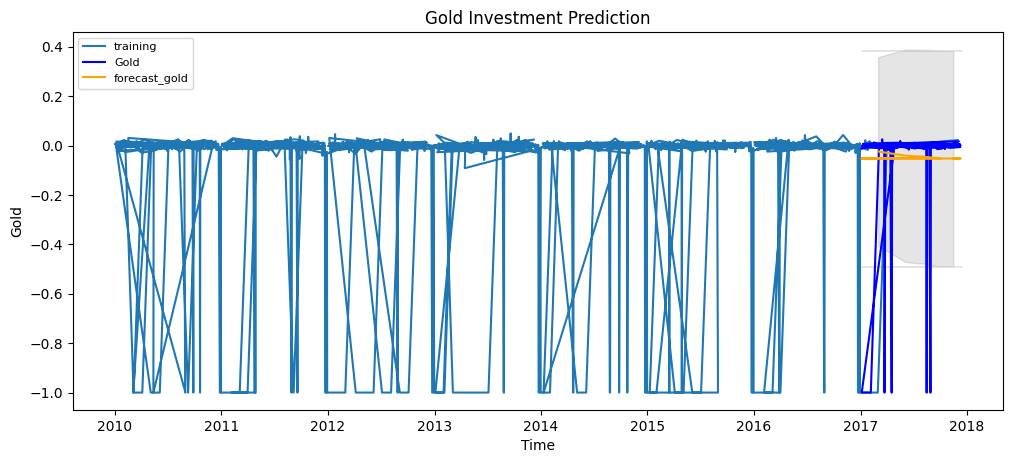

In [234]:
# Forecast
fc, se, conf = model_fit_gold.forecast(199, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_gold.index)
lower_series = pd.Series(conf[:, 0], index=test_data_gold.index)
upper_series = pd.Series(conf[:, 1], index=test_data_gold.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_gold, label='training')
plt.plot(test_data_gold, color = 'blue', label='Gold')
plt.plot(fc_series, color = 'orange',label='forecast_gold')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Gold Investment Prediction')
plt.xlabel('Time')
plt.ylabel('Gold')
plt.legend(loc='upper left', fontsize=8)
plt.show()

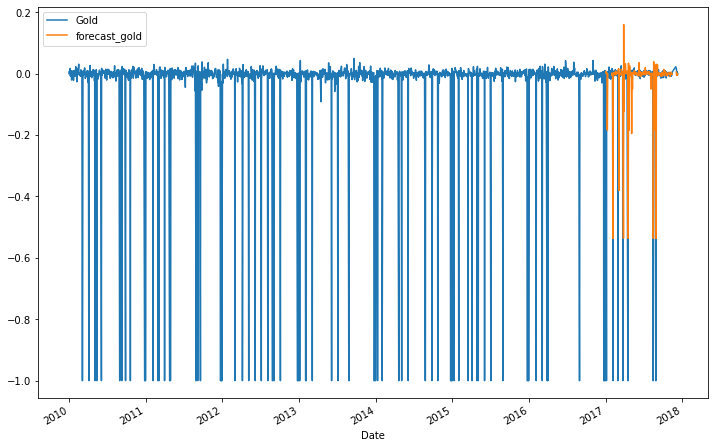

In [235]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_gold['Gold'],order=(3, 0, 2)) #(p,d,q)
results=model.fit()
df_gold['forecast_gold']=results.predict(start=1781,end=1982,dynamic=False)
df_gold[['Gold','forecast_gold']].plot(figsize=(12,8))

In [236]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data_gold, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_gold, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_gold, fc))
print('RMSE: '+str(rmse))

MSE: 0.04326787998651208
MAE: 0.09274652115252396
RMSE: 0.2080093266815507


**`Oil - Testing For Stationarity`**

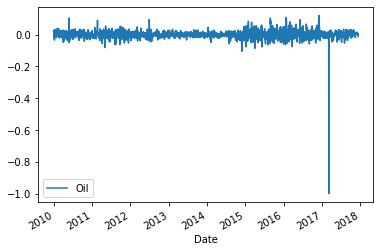

In [237]:
#plot Comp_stock
df_oil.plot()

In [238]:
df_oil = df_oil.replace(0, np.nan)
df_oil

,Oil
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
2010-08-01,0.001269
2010-11-01,-0.002417
2010-12-01,-0.021202
2010-01-13,-0.013987


In [239]:
df_oil.isnull().sum()

Oil    11
dtype: int64

In [240]:
df_oil.fillna(df_oil.mean(), inplace=True)

In [241]:
df_oil.Oil.round(3)

Date
2009-12-31    0.025
2010-04-01    0.027
2010-05-01    0.003
2010-06-01    0.022
2010-07-01   -0.006
2010-08-01    0.001
2010-11-01   -0.002
2010-12-01   -0.021
2010-01-13   -0.014
2010-01-14   -0.004
2010-01-15   -0.018
2010-01-19    0.013
2010-01-20   -0.014
2010-01-21   -0.020
2010-01-22   -0.021
2010-01-25    0.009
2010-01-26   -0.003
2010-01-27   -0.014
2010-01-28   -0.000
2010-01-29   -0.010
2010-01-02    0.021
2010-02-02    0.038
2010-03-02   -0.003
2010-04-02   -0.050
2010-05-02   -0.027
2010-08-02    0.010
2010-09-02    0.026
2010-10-02    0.010
2010-11-02    0.010
2010-12-02   -0.015
              ...  
2017-05-10    0.016
2017-06-10   -0.029
2017-09-10    0.005
2017-10-10    0.027
2017-11-10    0.007
2017-12-10   -0.013
2017-10-13    0.016
2017-10-16    0.008
2017-10-17    0.000
2017-10-18    0.003
2017-10-19   -0.015
2017-10-20    0.007
2017-10-23    0.005
2017-10-24    0.008
2017-10-25   -0.007
2017-10-26    0.008
2017-10-27    0.029
2017-10-30    0.004
2017-10-31    0

In [242]:
df_oil.shape

(1984, 1)

In [243]:
from scipy.stats import zscore
z_score=abs(zscore(df_oil))
print(df_oil.shape)

(1984, 1)


In [244]:
df_Oil=df_oil.loc[(z_score<2).all(axis=1)]
print(df_Oil.shape)

(1955, 1)


In [245]:
df_Oil.isnull().sum()

Oil    0
dtype: int64

In [246]:
test_result_oil=adfuller(df_Oil['Oil']) # adfuller give us 5 values

In [247]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_oil)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-16.079299916851483, 5.40018309042038e-29, 5, 1949, {'1%': -3.433709637523333, '5%': -2.863024085652552, '10%': -2.567560067343214}, -9860.758910387813)


In [248]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_oil(Oil):
    result=adfuller(Oil)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [249]:
adfuller_test_oil(df_Oil['Oil'])

ADF Test Statistic : -16.079299916851483
p-value : 5.40018309042038e-29
#Lags Used : 5
Number of Observations Used : 1949
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


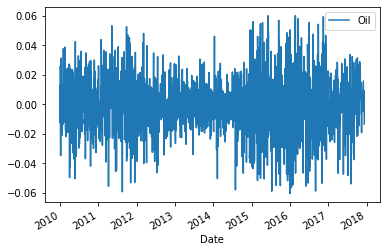

In [250]:
df_Oil.plot()

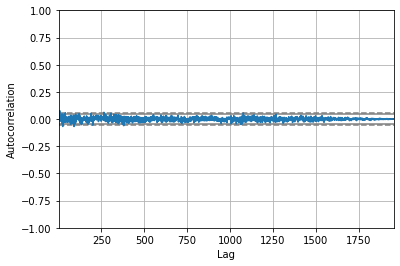

In [251]:
autocorrelation_plot(df_Oil['Oil'])
plt.show()

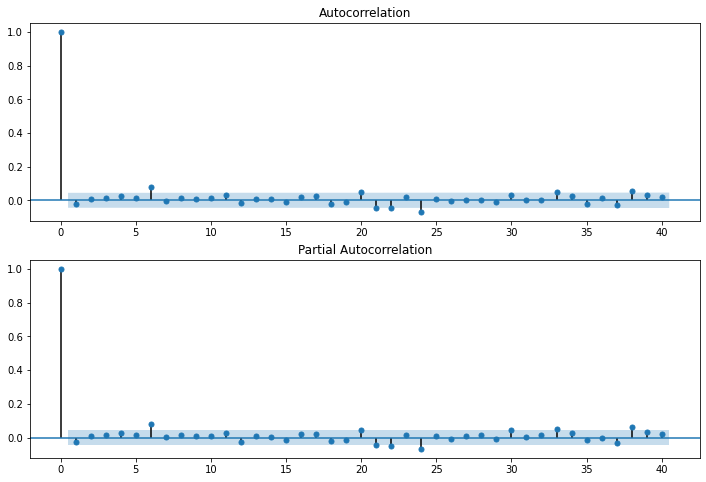

In [252]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_Oil['Oil'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Oil['Oil'].iloc[1:],lags=40,ax=ax2)

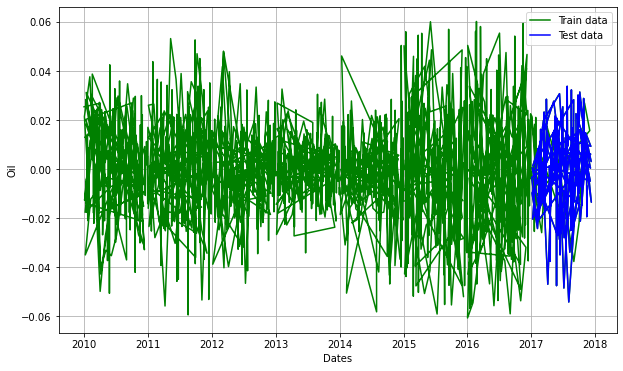

In [253]:
#split data into train and training set
df_log=df_Oil
train_data_oil, test_data_oil = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Oil')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data_oil, 'blue', label='Test data')
plt.legend()

In [254]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data_oil, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8918.414, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8917.617, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8917.618, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8915.618, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8917.449, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.010 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1756
Model:                        SARIMAX   Log Likelihood                4460.207
Date:                Sun, 01 Nov 2020   AIC                          -8918.414
Time:                        09:26:32   BIC                          -8912.943
Sample:                             0   HQIC                         -8916.392
                               - 1756                                  

In [255]:
from statsmodels.tsa.arima_model import ARIMA
model_oil=ARIMA(df_Oil['Oil'],order=(1,0,1)) # this order is p d q 
model_fit_oil=model_oil.fit(disp=-1)
model_fit_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Oil   No. Observations:                 1955
Model:                     ARMA(1, 1)   Log Likelihood                4998.066
Method:                       css-mle   S.D. of innovations              0.019
Date:                Sun, 01 Nov 2020   AIC                          -9988.131
Time:                        09:26:33   BIC                          -9965.819
Sample:                             0   HQIC                         -9979.929
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.828      0.408      -0.001       0.000
ar.L1.Oil     -0.2007      0.875     -0.229      0.819      -1.916       1.515
ma.L1.Oil      0.1773      0.879      0.202      0.840      -1.546       1.900
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.9837           +0.0000j            4.9837            0.5000
MA.1           -5.6398           +0.0000j            5.6398            0.5000
-----------------------------------------------------------------------------
"""

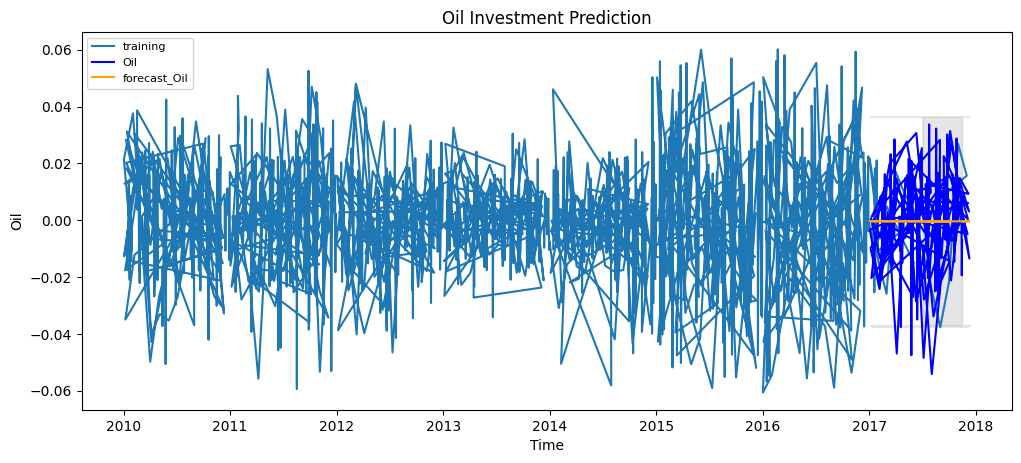

In [257]:
# Forecast
fc, se, conf = model_fit_oil.forecast(196, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_oil.index)
lower_series = pd.Series(conf[:, 0], index=test_data_oil.index)
upper_series = pd.Series(conf[:, 1], index=test_data_oil.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_oil, label='training')
plt.plot(test_data_oil, color = 'blue', label='Oil')
plt.plot(fc_series, color = 'orange',label='forecast_Oil')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Oil Investment Prediction')
plt.xlabel('Time')
plt.ylabel('Oil')
plt.legend(loc='upper left', fontsize=8)
plt.show()

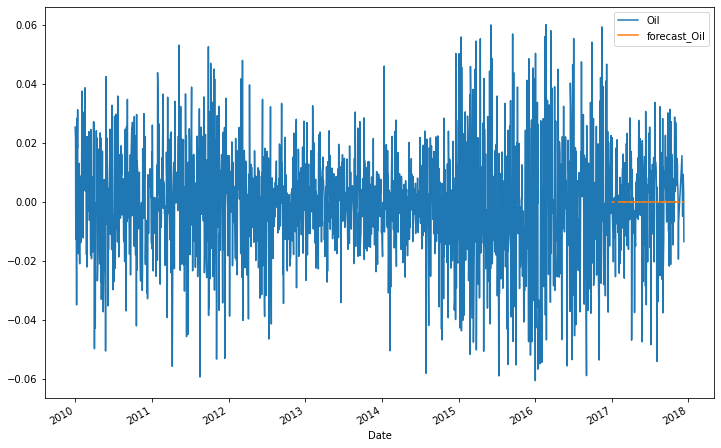

In [258]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_Oil['Oil'],order=(0, 0, 0)) #(p,d,q)
results=model.fit()
df_Oil['forecast_Oil']=results.predict(start=1756,end=1954,dynamic=False)
df_Oil[['Oil','forecast_Oil']].plot(figsize=(12,8))

In [259]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data_oil, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_oil, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_oil, fc))
print('RMSE: '+str(rmse))


MSE: 0.00024792474579351885
MAE: 0.012057057362533843
RMSE: 0.01574562624329432
